# Fudan PRML 23Spring Assignment1

<font color='red'>*Your Name, Student ID and Date: [Name], [Student ID], [Date]*</font>    

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

<font color='red' size = 3> *DDL: 2023.04.09 23:59* </font>

## 1. FDUML: your toy sklearn-like machine learning library (40 points)

In this assignment, you will fist implement your own sklearn-like machine learning library with `numpy`, named `fduml`.

sklearn: [scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/#)

In [1]:
# setup code, auto reload your .py file
%load_ext autoreload
%autoreload 2

In [2]:
# numpy
import numpy as np
np.random.seed(233)

In [3]:
# matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

You have to impletement several standard regression and classification methods in the `./fduml` folder:
1.   Logistic Regression (10 points)
2.   kNN Classification (10 points)
3.   DecisionTree Classification (10 points)
4.   Softmax Classification (10 points)

We have written most of the code for you already, and you only need to fill in the most essential parts. We have also prepared several test cases for you to check if your code works correctly.

Furthermore, you can also test the accuracy of your code by comparing its output with the output of sk-learn.

In [4]:
import sys
sys.path.append(r'C:\Users\Life_Dancer\Desktop\PRML-Spring23-FDU\assignment1\fduml')

from fduml import *

## 2. Optimization and Regularization (10 points)

To help you better understand the two fundamental concepts of `optimization` and `generalization` in machine learning, we have prepared a small experiment for you.

This section will make use of the `linear regression` algorithm that you have previously written. If you find that you need to improve your previous code to complete this section, you can go back and modify it.

**Dataset Construction**

We create a toy dataset for you sampled from the sin function (with Gaussian noise):

In [5]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

In [6]:
def create_toy_data(func, interval, sample_num, noise = 0.0, add_outlier = False, outlier_ratio = 0.001):
    """
    generate data with the given function
    
    input:
       - func: the input function
       - interval: the range of values of x, a tuple (start, end)
       - sample_num: number of samples
       - noise: the standard deviation of Gaussian noise
       - add_outlier:whether to generate outliers
       - outlier_ratio:proportion of outliers
       
    output:
       - X: samples, shape = [n_samples,1]
       - y: labels, shape = [n_samples,1]
    """
    
    X = np.random.rand(sample_num,1) * (interval[1]-interval[0]) + interval[0]
    y = func(X)

    # add Gaussian noise
    epsilon = np.random.normal(0, noise, (sample_num,1))
    y = y + epsilon
    
    # add outlier
    if add_outlier:
        outlier_num = int(sample_num * outlier_ratio)
        if outlier_num != 0:
            outlier_idx = np.random.randint(sample_num, size = [outlier_num,1])
            y[outlier_idx] = y[outlier_idx] * 5
            
    return X, y

In [7]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

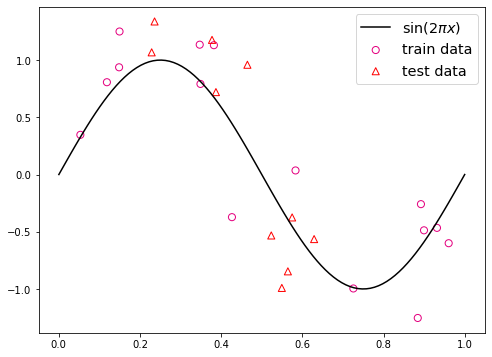

In [8]:
# generate toy dataset
func = sin
interval = (0,1)
train_num = 15
test_num = 10
noise = 0.5
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise = noise)
X_test, y_test = create_toy_data(func=func, interval=interval, sample_num=test_num, noise = noise)

X_underlying = np.linspace(interval[0],interval[1],num=100)
y_underlying = sin(X_underlying)


# plot
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", marker = '^', s=50, label="test data")
plt.legend(fontsize='x-large')
plt.show()

**Your Tasks (10 points)**

1) Take the `linear regression algorithm` you implemented with a `polynomial basis function` to implement a `polynomial regression algorithm` to fit the above training data;    
2) Test the performance of the fitted model on the training set and test set (mean squared error);      
3) Degrees of polynomials you need to try at least: 0, 1, 3, 8, 12;    
4) You should also try polynomial regression with a regularization term;   
5) You need to visualize the fitted function;

Write your implementation code below or in `fduml`, please write comments:

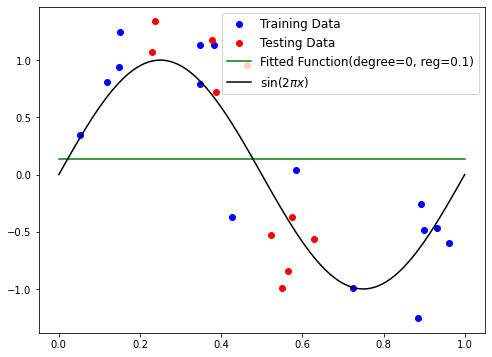

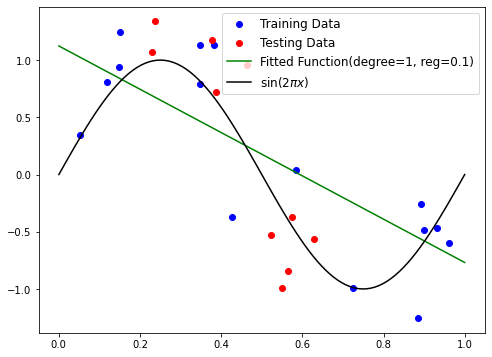

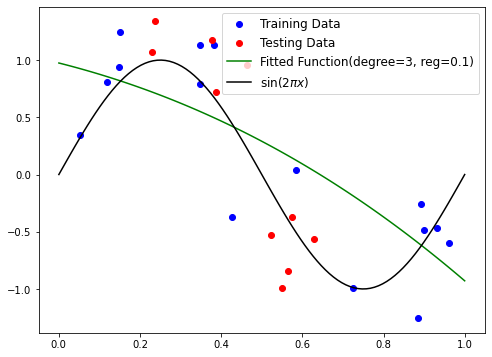

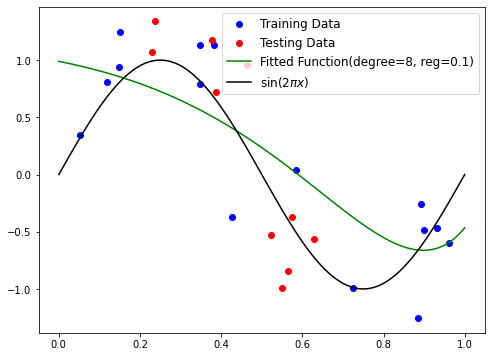

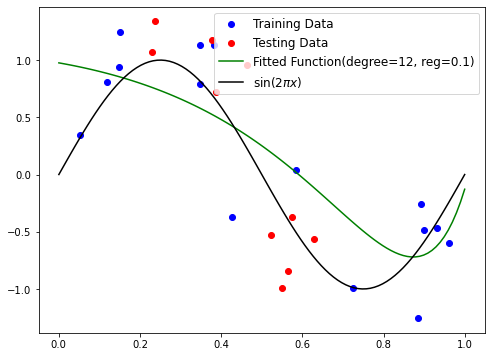

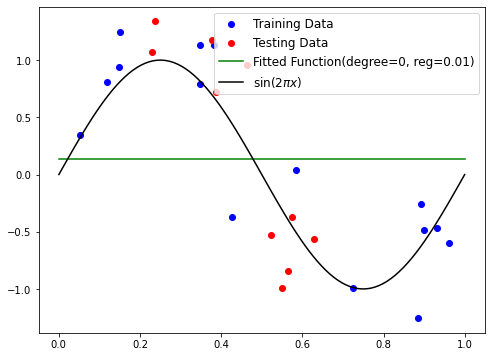

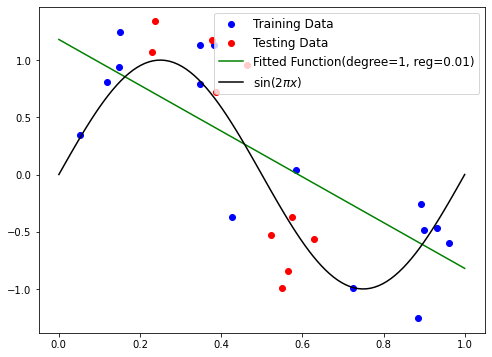

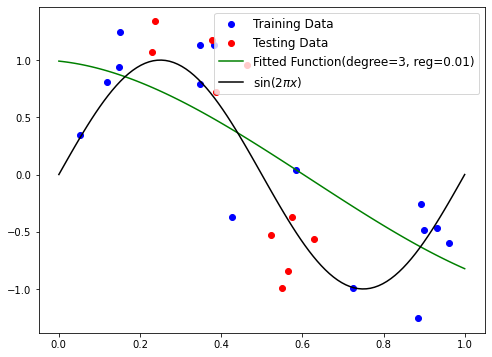

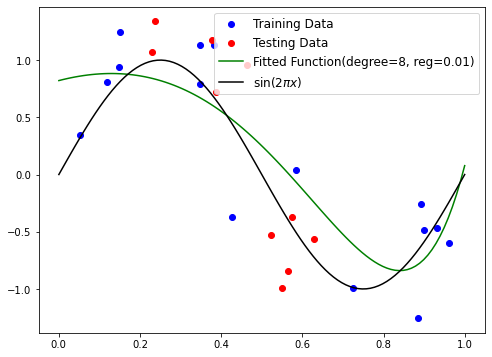

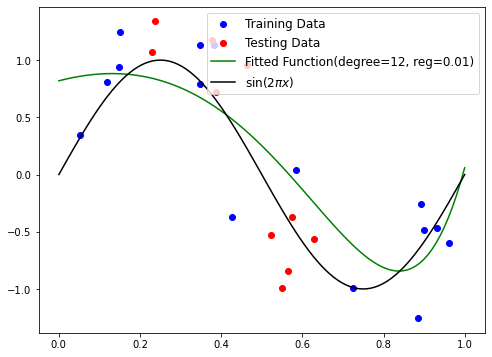

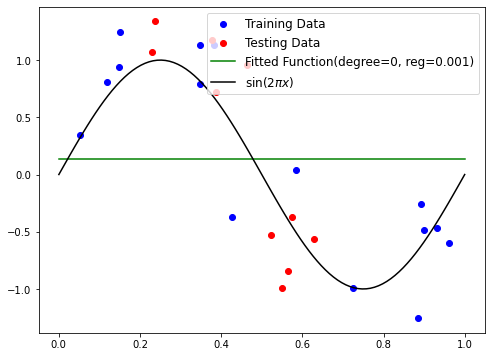

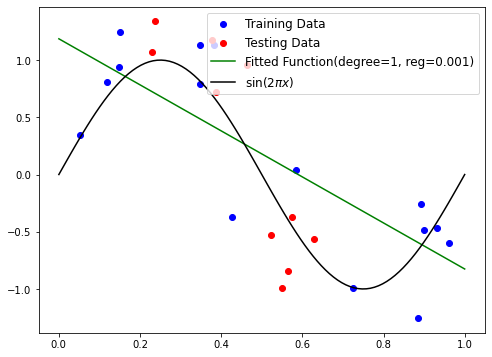

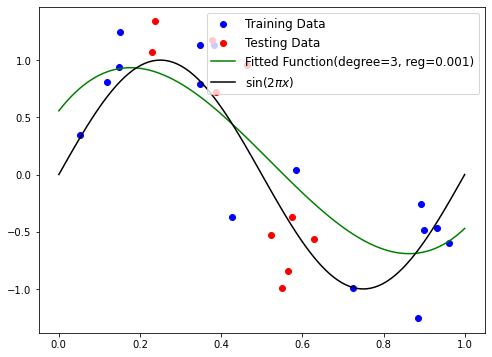

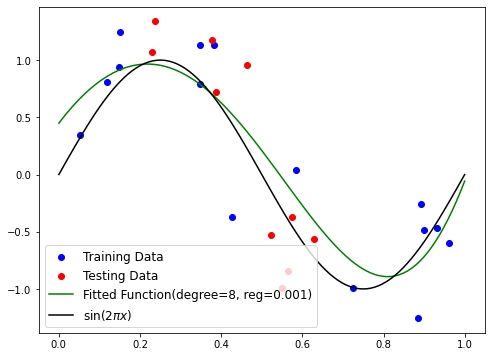

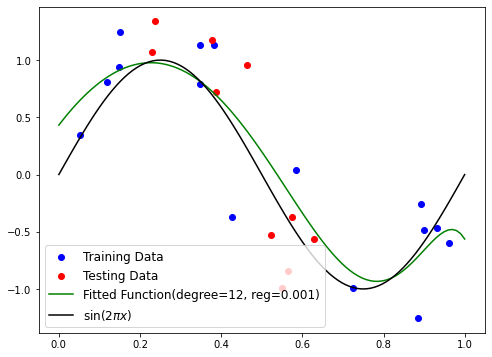

reg 0.1	Degree 0: Training MSE Loss = 0.6481281731753937, Testing MSE Loss = 0.7850201424603926
reg 0.1	Degree 1: Training MSE Loss = 0.22642075647094861, Testing MSE Loss = 0.4614342833174643
reg 0.1	Degree 3: Training MSE Loss = 0.22152408034830867, Testing MSE Loss = 0.5041658125422752
reg 0.1	Degree 8: Training MSE Loss = 0.19159095246154145, Testing MSE Loss = 0.4284331596756504
reg 0.1	Degree 12: Training MSE Loss = 0.18624881938032786, Testing MSE Loss = 0.42801018626863163
reg 0.01	Degree 0: Training MSE Loss = 0.6481281731753937, Testing MSE Loss = 0.7850201424603901
reg 0.01	Degree 1: Training MSE Loss = 0.2249147761968813, Testing MSE Loss = 0.4479148281507707
reg 0.01	Degree 3: Training MSE Loss = 0.20621248516408858, Testing MSE Loss = 0.44424768298765366
reg 0.01	Degree 8: Training MSE Loss = 0.16090102770264375, Testing MSE Loss = 0.35740111816838493
reg 0.01	Degree 12: Training MSE Loss = 0.1601933949790929, Testing MSE Loss = 0.35620007836075707
reg 0.001	Degree 0: Tra

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from fduml.linear_model.linear_reg import LinearRegression
from sklearn.metrics import mean_squared_error

# Define a function to create a polynomial matrix from X
def create_polynomial_matrix(X, degree):
    basis_matrix = np.zeros((X.shape[0], degree+1))
    x = X.reshape(X.shape[0])
    for i in range(degree+1):
        basis_matrix[:,i] = x**i
    return basis_matrix

# Define a function to perform polynomial regression with regularization
def polynomial_regression(X, y, degree, reg=0):
    X_basis = create_polynomial_matrix(X, degree)
    lin_reg = LinearRegression(reg=reg)
    lin_reg.fit(X_basis, y)
    return lin_reg

# Define a function to visualize the fitted function
def plot_fitted_function(X_train, y_train, X_test, y_test, interval, fitted_function, degree, reg):
    X_range = np.linspace(interval[0],interval[1],num=100)
    y_range = fitted_function.predict(create_polynomial_matrix(X_range, fitted_function.coef_.shape[0]-1))
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='red', label='Testing Data')
    plt.plot(X_range, y_range, color='green', label='Fitted Function(degree={}, reg={})'.format(degree, reg))
    plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
    plt.legend(loc='best', fontsize='large')
    plt.show()

# Try different degrees of polynomials and calculate mean squared error for each degree
degrees = [0, 1, 3, 8, 12]
regs = [0.1, 0.01, 0.001]
train_mses = []
test_mses = []

for reg in regs:
    train_mse = []
    test_mse = []
    for degree in degrees:
        # Train the model
        lin_reg = polynomial_regression(X_train, y_train, degree, reg)

        # Calculate the training and testing mean squared errors
        y_train_pred = lin_reg.predict(create_polynomial_matrix(X_train, degree))
        train_mse.append(mean_squared_error(y_train, y_train_pred))

        y_test_pred = lin_reg.predict(create_polynomial_matrix(X_test, degree))
        test_mse.append(mean_squared_error(y_test, y_test_pred))

        # Visualize the fitted function
        plot_fitted_function(X_train, y_train, X_test, y_test, interval, lin_reg, degree, reg)

    train_mses.append(train_mse)
    test_mses.append(test_mse)

# Print the mean squared errors for each degree of polynomial
for i in range(len(regs)):
    for j in range(len(degrees)):
        print('reg {}\tDegree {}: Training MSE Loss = {}, Testing MSE Loss = {}'.format(regs[i], degrees[j], train_mses[i][j], test_mses[i][j]))


## 3. Machine Learning with Tabular Data (50 points)

### 1) Task Introduction

In this section, you will use the algorithms you implemented to solve more realistic tasks.

You are given a dataset of heart attack predictions. For each patient, there are some characteristics of him/her in the dataset. Your task is to build a machine learning model to predict whether he/she has heart disease based on these features.

### 2) Dataset Introduction

The training and testing datasets are in the `dataset` folder.

The following is an introduction to the attributes in the dataset:

-   Age : Age of the patient

-   Sex : Sex of the patient (1:male, 0:female)

-   cp : Chest Pain type

    -   Value 0: typical angina

    -   Value 1: atypical angina

    -   Value 2: non-anginal pain

    -   Value 3: asymptomatic

-   trtbps : resting blood pressure (in mm Hg)

-   chol: cholesterol in mg/dl fetched via BMI sensor

-   fbs: (fasting blood sugar > 120 mg/dl)

    -   1 = true

    -   0 = false

-   rest_ecg: resting electrocardiographic results

    -   Value 0: normal

    -   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    -   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

-   thalach: maximum heart rate achieved

-   exang: exercise induced angina

    -   1 = yes

    -   0 = no

-   old peak: ST depression induced by exercise relative to rest

-   slp: the slope of the peak exercise ST segment

    -   0 = unsloping

    -   1 = flat

    -   2 = downsloping

-   caa: number of major vessels (0-3)

-   thall : thalassemia

    -   0 = null

    -   1 = fixed defect

    -   2 = normal

    -   3 = reversable defect

-   output: diagnosis of heart disease (angiographic disease status)

    -   0: < 50% diameter narrowing. less chance of heart disease

    -   1: > 50% diameter narrowing. more chance of heart disease

### 3) Load Your Dataset

Different people may be assigned different datasets, please write your training dataset number here:<font color='red'> *[train0]* </font>

In [121]:
import pandas as pd

# Load the data with the first column as index
heart_df = pd.read_csv(r'C:\Users\Life_Dancer\Desktop\PRML\assignment1\dataset\train0.csv', index_col=0)
test = pd.read_csv(r'C:\Users\Life_Dancer\Desktop\PRML\assignment1\dataset\test.csv', index_col=0)

### 4) Exploratory Data Analysis (5 points)

Data is an important part of machine learning, and many people tend to ignore the analysis of data. In this part of the assignment, you will first conduct [exploratory data analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) on your given dataset. More analysis is encouraged. More than statistics and figures, it is better to draw some conclusions from that. 

Such analysis helps you to know the distribution of your data. Besides, it may also help you find out the **TRAPS** inside the data.
If you find any TRAPS, report the detail of them and how you will alleviate the harm they bring. You don't need to do much processing on the TRAPS here, you only need to perform statistical analysis on the data.

In [120]:
# from dataprep import eda as dpeda

# report = dpeda.create_report(heart_df, title='Heart Attack Dataset')
# report

In [12]:
# report_test = dpeda.create_report(test, title='Heart Attack Testing Dataset')
# report_test

#### Conclusions
Taking advantage of the dataprep library, I get a report which conducts various EDAs on the heart attack dataset. As we can see, there are some traps in the both training and testing data:

##### For training data:

(1) First of all, as for the `chol` variable, the majority lies in [157, 343], but there is one of value 409 is far away from this interval. Cholesterol=409 is too high for a human, so it is very likely to be an outlier. 

(2) Next, for the `thalachh` variable, as is clealy shown in the chart, there is an outlier `thalachh=71`, for it's too low for a 67-year-old male adult. 

(3) Moreover, another trap, which is more subtle to be captured than the previous ones, is the only null value in the `thall` variable. Since null value doesn't contain much information for the heart attack, it's may not be a good idea to take null values into further training and testing or otherwise it may affect the result of training and testing. 

There are some other underlying problems of the dataset:

(1) As we can see in the `data insight` part of the report, the data of `trtbps` and `oldpeak` are skewed, which may affect the training and testing result.

(2) As can be seen in the box chart, the number of `cp=0` is much greater than cp with other values, and so does `fbs=0`. On the contrary, there are too few `restecg=2`, and so does `slp=2' and 'caa=4'. These imbalace may cause some problems

(3) The heat map shows that there might be some correlation between `oldpeak` and `slp`, `thalachh` and `slp`. 

##### For testing data:

There are similar problems:

(1) one outlier with `chol=407`

(2) `oldpeak` is skewed

(3) there is a null value in `thall`

(4) `cp` and `exng` are correlated

### 5) Build Your Baselines (15 points)

You need to use at least three algorithms of `kNN`, `decision tree`, and `logistic regression` to complete this task.

The following code may include data processing, model building, model training, model evaluation and other parts. You can also organize this part of code according to your ideas.    
You may need to build the validation set yourself.  
You can test whether your model can fit a few samples first, and then test on the full dataset.  
You may need to test the speed of the vectorized implementation of several algorithms.    
Visualization is encouraged.   
Please follow standard machine learning procedures, i.e. you CANNOT use the test set at any time to tune the parameters of the model. 

Note: *This section mainly verifies the correctness of your previous code and gets the baseline results.*

In [122]:
from sklearn.preprocessing import StandardScaler

X_train = heart_df.drop('output', axis=1)
y_train = heart_df['output']

X_test = test.drop('output', axis=1)
y_test = test['output']

# data processing, centering the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
y_train = y_train.values

X_test = scaler.transform(X_test)
y_test = y_test.values

In [14]:
def time_function(f, *args):
  """
  Call a function f with args and return the time (in seconds) that it took to execute.
  """
  import time
  tic = time.time()
  f(*args)
  toc = time.time()
  return toc - tic

**a) kNN**

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from fduml.neighbors.k_nearest_neighbor import KNeighborsClassifier

n_neighbors = 3
num_loops = 2

# using K-fold validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize the knn classifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors, num_loops=num_loops)
fold_accuracies = []
for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    knn.fit(X_fold_train, y_fold_train)
    y_pred = knn.predict(X_fold_val)
    accuracy = np.mean(np.equal(y_pred, y_fold_val))
    fold_accuracies.append(accuracy)
# get the validation accuracy for a specific n_neighbors
mean_accuracy = np.mean(fold_accuracies)

print("Validation accuracy = {}".format(mean_accuracy))

# test the time of using different implementation of compute distances function
two_loop_time = time_function(knn.compute_distances_two_loops, X_test)
print ('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(knn.compute_distances_one_loop, X_test)
print ('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(knn.compute_distances_no_loops, X_test)
print ('No loop version took %f seconds' % no_loop_time)

dists = knn.compute_distances_no_loops(X_test)
dists_one = knn.compute_distances_one_loop(X_test)
dists_two = knn.compute_distances_two_loops(X_test)

# verify that the result of different implementation of compute distances function are the same 
difference1 = np.linalg.norm(dists - dists_one, ord='fro')
difference2 = np.linalg.norm(dists - dists_two, ord='fro')
assert(difference1<0.001 and difference2<0.001)

# test the performance of the knn on the testset
y_pred_test = knn.predict(X_test)
accuracy = np.mean(np.equal(y_pred_test, y_test))
print("Test Accuracy = {}".format(accuracy))

Validation accuracy = 0.8666666666666666
Two loop version took 0.036176 seconds
One loop version took 0.000000 seconds
No loop version took 0.000000 seconds
Test Accuracy = 0.5652173913043478


**b) Decision Tree**

criterion=info_gain	accuracy=0.7733333333333334
criterion=info_gain_ratio	accuracy=0.7933333333333333
criterion=gini	accuracy=0.8
criterion=error_rate	accuracy=0.8133333333333332


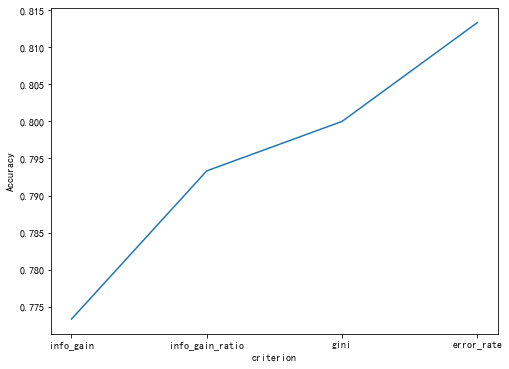

Test Accuracy for the best decision tree: 0.5217391304347826


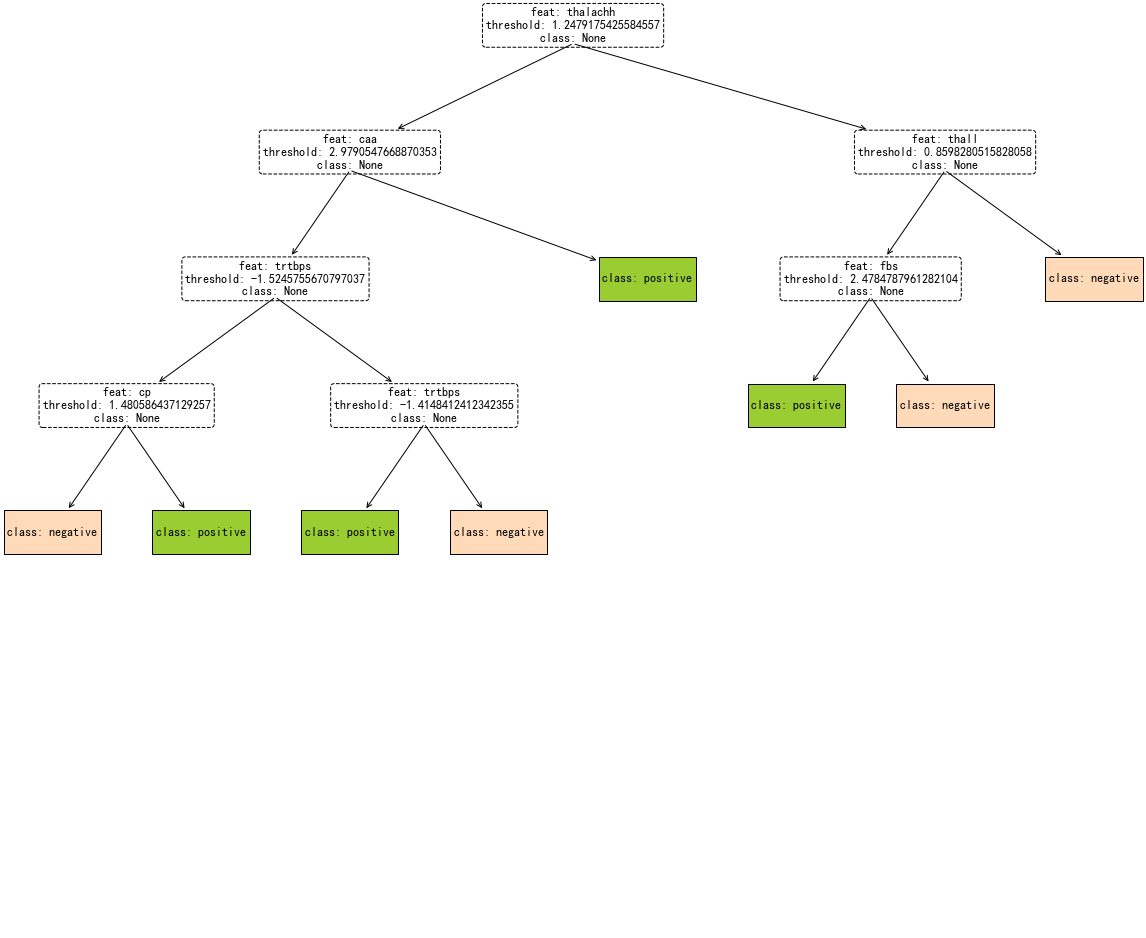

In [20]:
from fduml.tree.decision_tree import DecisionTreeClassifier
from fduml.tree.plot import plot_tree
from sklearn.model_selection import KFold

feature_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa' ,'thall']
class_names = ['negative', 'positive']

criterion_list = ["info_gain", "info_gain_ratio", "gini", "error_rate"]

accuracies = []
models = []

# k-fold validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for criterion in criterion_list:
    # initialize the decision tree classifier
    dt = DecisionTreeClassifier(criterion=criterion)
    fold_accuracies = []
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        dt.fit(X_fold_train, y_fold_train)
        y_pred = dt.predict(X_fold_val)
        accuracy = np.mean(np.equal(y_pred, y_fold_val))
        fold_accuracies.append(accuracy)
    mean_accuracy = np.mean(fold_accuracies)
    accuracies.append(mean_accuracy)
    models.append(dt)

    print("criterion={}\taccuracy={}".format(criterion, mean_accuracy))

# store the best decision tree classifier that gets the best validation accuracy
best_dt = models[np.argmax(accuracies)]
    
# visialize the accuracy of different criterion for a decision tree classifier
plt.plot(criterion_list, accuracies)
plt.xlabel('criterion')
plt.ylabel('Accuracy')
plt.show()

# visualize the best decision tree classifier
plot_tree(best_dt, feature_names, class_names)

# test the performance of the best decision tree on testset
y_pred_test = best_dt.predict(X_test)
accuracy = np.mean(np.equal(y_pred_test, y_test))
print("Test Accuracy for the best decision tree: {}".format(accuracy))

**c) Logistic Regression**

In [123]:
from fduml.linear_model.softmax import SoftmaxClassifier
import matplotlib.pyplot as plt
import time

lr = 0.001
reg = 0.01
bs = 32
iterations = 200

kf = KFold(n_splits=5, shuffle=True, random_state=37)

sfc = SoftmaxClassifier(learning_rate=lr, reg=reg, num_iters=iterations, batch_size=bs, loss_type='vectorized')
# k-fold validation
fold_accuracies = []
for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    sfc.fit(X_fold_train, y_fold_train)
    y_pred = sfc.predict(X_fold_val)
    accuracy = np.mean(np.equal(y_pred, y_fold_val))
    fold_accuracies.append(accuracy)
# get the validation accuracy of the softmax classifier
mean_accuracy = np.mean(fold_accuracies)
print("Validation Accuracy = {}".format(mean_accuracy))

# test the time of different implementaion of computing softmax loss, showing the effeciency of vectorization
start = time.time()
loss_naive = sfc.softmax_loss_naive(sfc.W, X_test, y_test, sfc.reg)
time1 = time.time() - start
print("Time for naive loss = {}s".format(time1))

start = time.time()
loss_vec = sfc.softmax_loss_vectorized(sfc.W, X_test, y_test, sfc.reg)
time2 = time.time() - start
print("Time for vectorized loss = {}s".format(time2))

# test the performance of the softmax classifier on the testset
y_test_pred = sfc.predict(X_test)
accuracy = np.mean(np.equal(y_test_pred, y_test))
print("Test accuracy = {}".format(accuracy))

Validation Accuracy = 0.6933333333333334
Time for naive loss = 0.0009996891021728516s
Time for vectorized loss = 0.0s
Test accuracy = 0.8260869565217391


### 6) Exploration (25 points)

Now that you have built your baselines, you need to improve your solution. You can do more processing on the data, improve the model, adjust the evaluation indicators, and so on. You can explore and analyze as much as you can below.

#### (i) More data processing
As shown in the conclusions of exploratory data analysis, there are some traps and underlying problems for the heart attack dataset, so more data processing should be conducted.
First, we need to remove the outliers: 


In [141]:
import pandas as pd

# Load the data with the first column as index
heart_df = pd.read_csv(r'C:\Users\Life_Dancer\Desktop\PRML\assignment1\dataset\train0.csv', index_col=0)
test = pd.read_csv(r'C:\Users\Life_Dancer\Desktop\PRML\assignment1\dataset\test.csv', index_col=0)

heart_df = heart_df.drop(heart_df[heart_df['chol'] == 409].index[0])
heart_df = heart_df.drop(heart_df[heart_df['thalachh'] == 71].index[0])
heart_df = heart_df.drop(heart_df[heart_df['thall'] == 0].index[0])

test = test.drop(test[test['chol'] == 407].index[0])

Then we need to adjust the data of the skewed variables `trtbps` and `oldpeak`:

In [142]:
# Using log transformation to metigate skewness
heart_df['trtbps'] = np.log(heart_df['trtbps'] + 1e-8)
heart_df['oldpeak'] = np.log(heart_df['oldpeak'] + 1e-8)

test['trtbps'] = np.log(test['trtbps'] + 1e-8)

Other than the underlying problems of the dataset itself, there are some problems of the way I processing the data previously. Many features contain discrete class labels, not continuous values. But I zeroed the mean of them and they were divided by variance. This a wrong approach for class labels. Here is the correct way to do this:

In [143]:
X_train = heart_df.drop('output', axis=1)
y_train = heart_df['output']
X_test = test.drop('output', axis=1)
y_test = test['output']

# only zero mean and divide by variance for the continuous values, while the discrete ones remain intact
continuous_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
train_mean = X_train[continuous_features].mean()
train_var = X_train[continuous_features].std()
X_train[continuous_features] = (X_train[continuous_features] - train_mean) / train_var
X_test[continuous_features] = (X_test[continuous_features] - train_mean) / train_var

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

#### (ii) Tuning Hyper-parameters

There are many hyper-parameters for these three classifiers. We need to experiment on many hyper-parameters and find the ones that suit the models best.

**a) KNN**

Max Validation accuracy = 0.7967816091954022, n_neighbors = 1


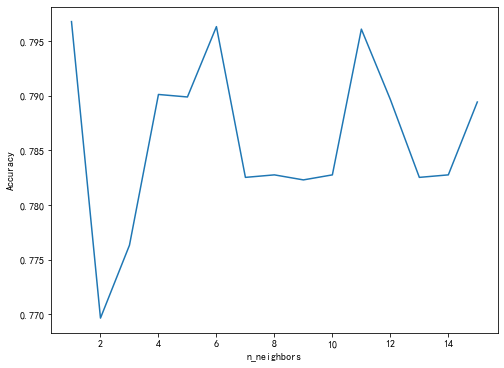

Test Accuracy for the best knn: 0.6222222222222222


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from fduml.neighbors.k_nearest_neighbor import KNeighborsClassifier

n_neighbors_list = [i for i in range(1, 16)]
num_loops = 2
accuracies = []
models = []

# using K-fold validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n_neighbors in n_neighbors_list:
    # initialize the knn classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, num_loops=num_loops)
    fold_accuracies = []
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        knn.fit(X_fold_train, y_fold_train)
        y_pred = knn.predict(X_fold_val)
        accuracy = np.mean(np.equal(y_pred, y_fold_val))
        fold_accuracies.append(accuracy)
    # get the validation accuracy for a specific n_neighbors
    mean_accuracy = np.mean(fold_accuracies)
    accuracies.append(mean_accuracy)
    models.append(knn)

# get the knn that has the best validation accuracy
index = np.argmax(accuracies)
best_knn = models[index]

print("Max Validation accuracy = {}, n_neighbors = {}".format(accuracies[index], n_neighbors_list[index]))
    
# visualize different n_neighbors and its corresponding validation accuracy
plt.plot(n_neighbors_list, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# test the performance of the best knn on the testset
y_pred_test = best_knn.predict(X_test)
accuracy = np.mean(np.equal(y_pred_test, y_test))
print("Test Accuracy for the best knn: {}".format(accuracy))

We can see that, after applying the data processing and tuning the hyperparameters, the best n_neighbors for knn is 1. In previous implementation, the n_neighbor I choose is 3, the validation accuracy is 0.867 and the test accuracy is 0.565. The massive gap between these two accuracies shows that the knn is not generalizing well on the unseen data.This time, after choosing the best knn, I get a smaller validation accuracy and a higher test accuracy, which shows a better performance.

**b) Decision Tree**

Max Validation Accuracy=0.8636781609195403	criterion=info_gain_ratio	splitter=random	max_features=7
Test Accuracy for the best decision tree: 0.6444444444444445


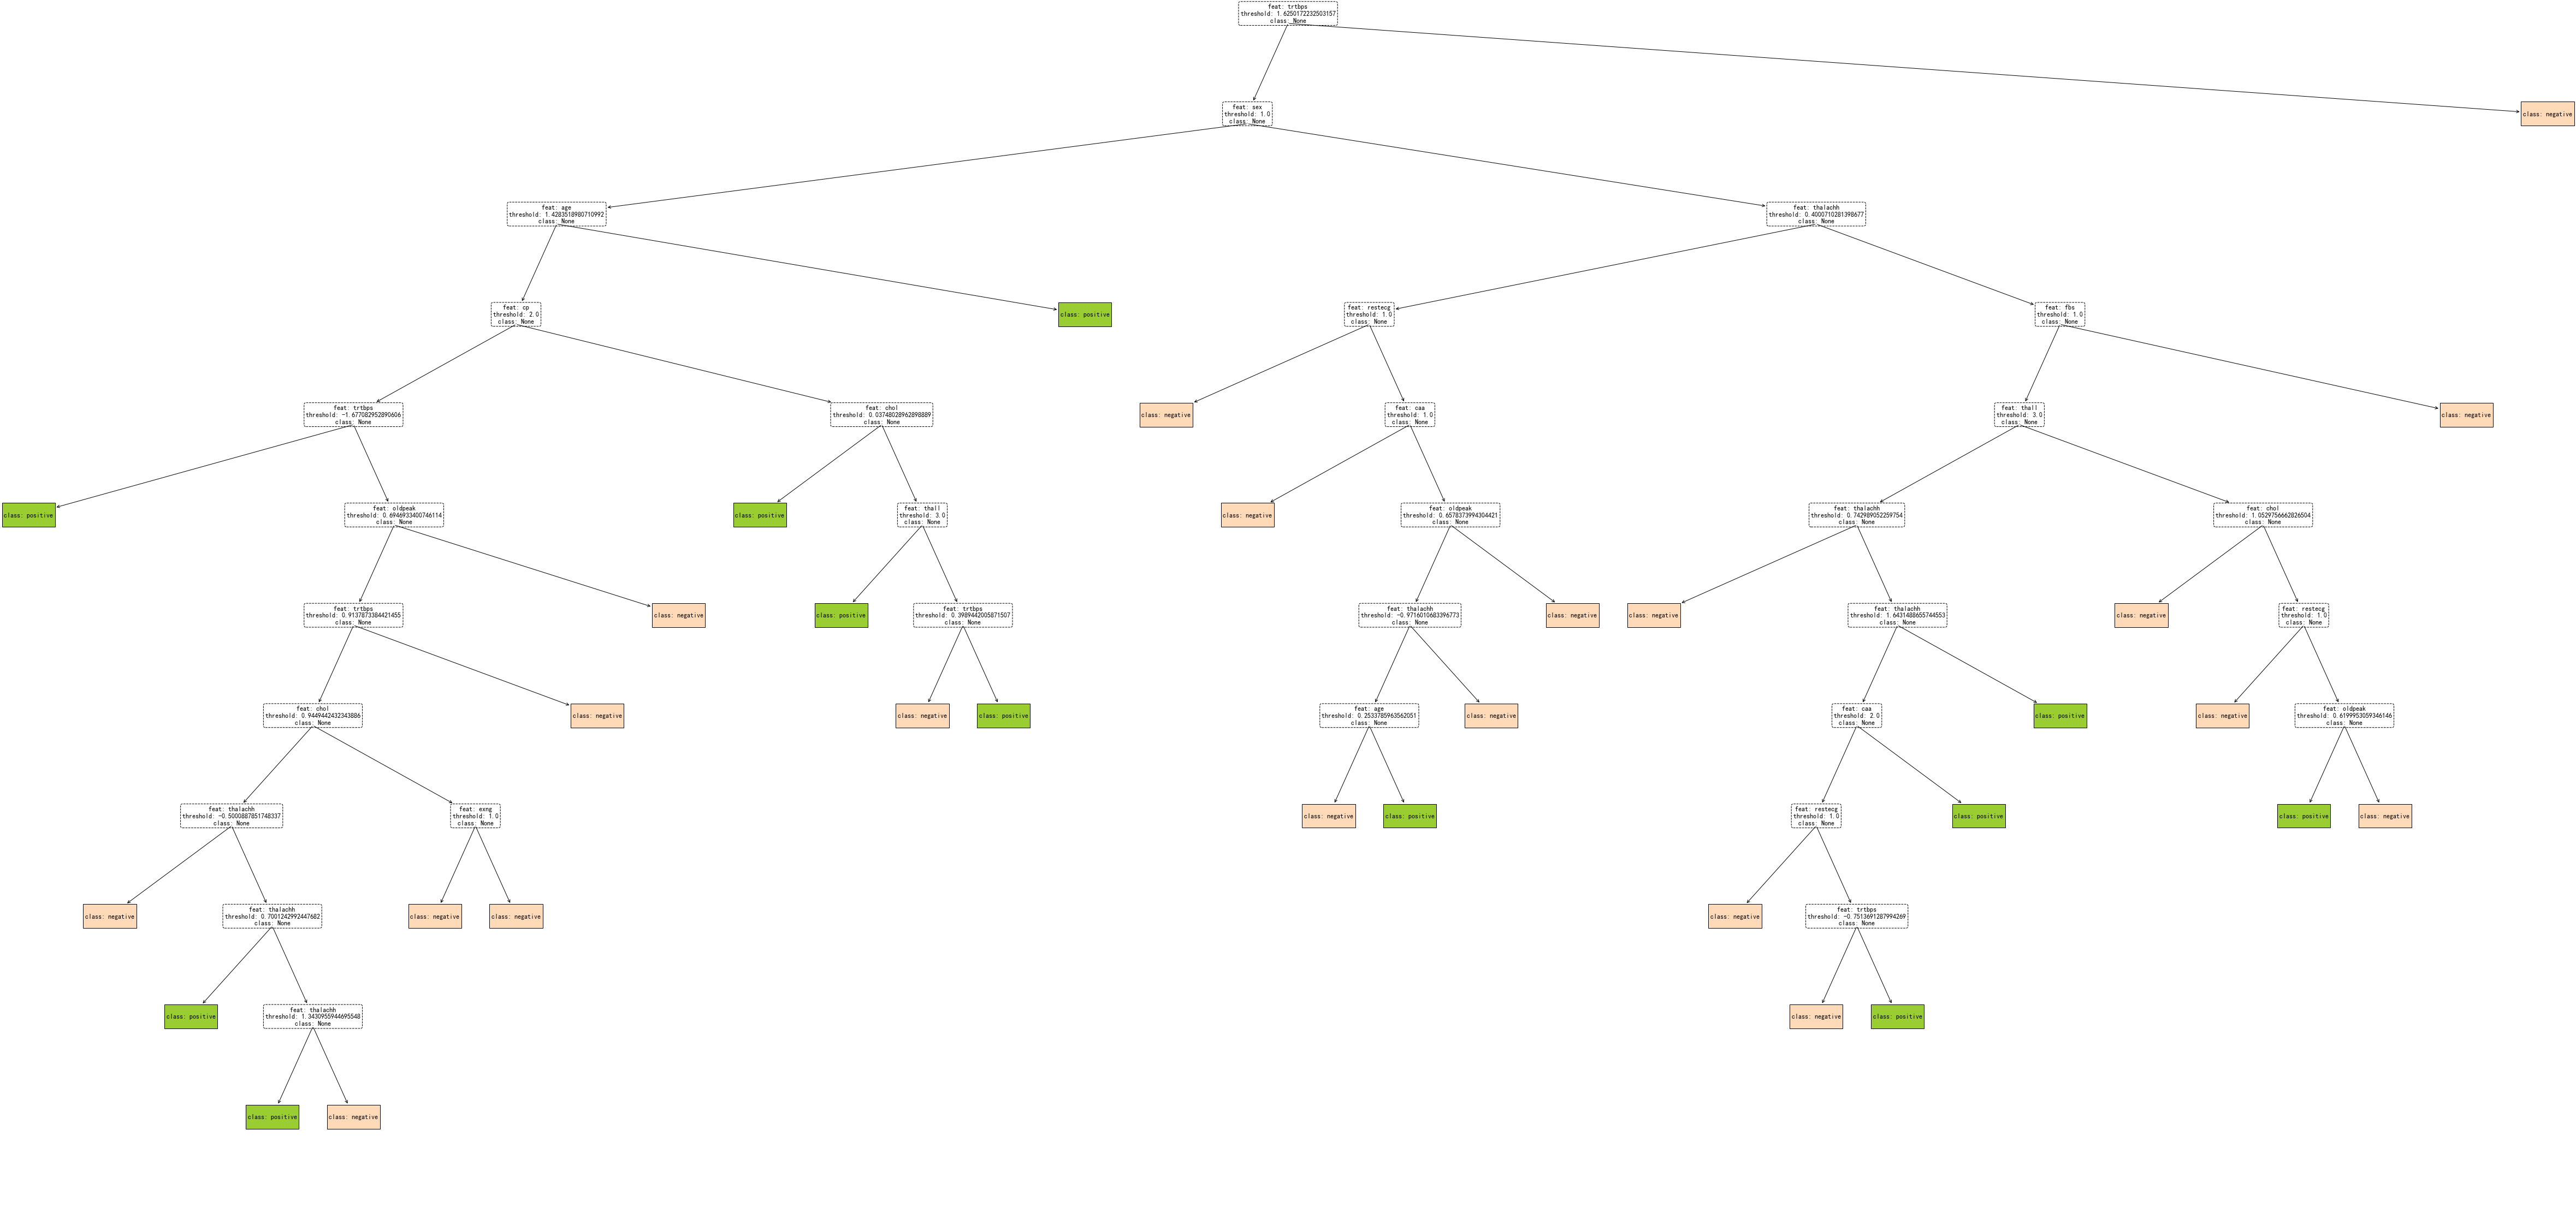

In [114]:
from fduml.tree.decision_tree import DecisionTreeClassifier
from fduml.tree.plot import plot_tree
from sklearn.model_selection import KFold

feature_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa' ,'thall']
class_names = ['negative', 'positive']

criterion_list = ["info_gain", "info_gain_ratio", "gini", "error_rate"]
splitter_list = ["best", "random"]
max_features_list = [None, 7, 13]
accuracies = []
models = []

# k-fold validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for criterion in criterion_list:
    for splitter in splitter_list:
        for max_features in max_features_list:
            # initialize the decision tree classifier
            dt = DecisionTreeClassifier(splitter=splitter, max_features=max_features, criterion=criterion)
            fold_accuracies = []
            for train_index, val_index in kf.split(X_train):
                X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
                y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
                dt.fit(X_fold_train, y_fold_train)
                y_pred = dt.predict(X_fold_val)
                accuracy = np.mean(np.equal(y_pred, y_fold_val))
                fold_accuracies.append(accuracy)
            mean_accuracy = np.mean(fold_accuracies)
            accuracies.append(mean_accuracy)
            models.append(dt)

            # print("criterion={}\tsplitter={}\tmax_feature={}\taccuracy={}".format(criterion, splitter, max_features, mean_accuracy))

# store the best decision tree classifier that gets the best validation accuracy
best_dt = models[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)

print("Max Validation Accuracy={}\tcriterion={}\tsplitter={}\tmax_features={}".format(best_accuracy, best_dt.criterion, best_dt.splitter, best_dt.max_features))

# visualize the best decision tree classifier
plot_tree(best_dt, feature_names, class_names)

# test the performance of the best decision tree on testset
y_pred_test = best_dt.predict(X_test)
accuracy = np.mean(np.equal(y_pred_test, y_test))
print("Test Accuracy for the best decision tree: {}".format(accuracy))

There are many hyperparameters to tune and I only tested a few of them to see whether there is a performance improvement. The result doesn't fail our expectations. The test accuracy raises from 0.52(the result in section 5) to 0.64.

**c) Logistic Regression**

In [160]:
from fduml.linear_model.softmax import SoftmaxClassifier
import matplotlib.pyplot as plt
import time

lr_list = [1, 0.1, 0.01, 0.001, 0.0001]
reg_list = [1, 0, 0.1, 0.01]
bs_list = [4, 64, 128]
iterations_list = [50, 100, 150]

best_accuracy = 0
best_sfc = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lr in lr_list:
    for reg in reg_list:
        for bs in bs_list:
            for iterations in iterations_list:
                sfc = SoftmaxClassifier(learning_rate=lr, reg=reg, num_iters=iterations, batch_size=bs, loss_type='vectorized')
                # k-fold validation
                fold_accuracies = []
                for train_index, val_index in kf.split(X_train):
                    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
                    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
                    sfc.fit(X_fold_train, y_fold_train)
                    y_pred = sfc.predict(X_fold_val)
                    accuracy = np.mean(np.equal(y_pred, y_fold_val))
                    fold_accuracies.append(accuracy)
                # get the validation accuracy of the softmax classifier
                mean_accuracy = np.mean(fold_accuracies)
                if mean_accuracy > best_accuracy:
                    best_sfc = sfc
                    best_accuracy = mean_accuracy

print("Max Validation Accuracy={}\tlr={}\treg={}\tbs={}\titerations={}".format(best_accuracy, best_sfc.learning_rate, best_sfc.reg, best_sfc.batch_size, best_sfc.num_iters))

# test the performance of the softmax classifier on the testset
y_test_pred = best_sfc.predict(X_test)
accuracy = np.mean(np.equal(y_test_pred, y_test))
print("Test accuracy = {}".format(accuracy))

Max Validation Accuracy=0.8983908045977012	lr=1	reg=0	bs=128	iterations=150
Test accuracy = 0.7555555555555555


In the previous implementation of logistic regression in section 5, the max validation accuracy is 0.69 but the test accuracy is 0.82. The test accuracy is much higher than the validation accuracy, which may be a sign of overfitting or data imbalance. However, in this experiment, after tuning the hyperparameters and using data processing like log transformation, this problem is solved, leading to a 0.898 max validation accuracy and 0.76 test accuracy. The test accuracy is the highest among the three different classifiers.

#### (ii) Adjust evaluation indicators
Previously, I use accuracy as the evaluation indicator. However, this is a binary classification problem, so it's not suitable to use accuracy to evaluate the performance of a model. I should use AUC score instead. 

Here is the modified code:

**a) KNN**

During the experiment, `random_state` in `kf = KFold(n_splits=5, shuffle=True, random_state=137)` affects the performance. After trying various values of random_state, random_state=137 performs the best.


Max Validation AUC = 0.752399585921325	n_neighbors=1


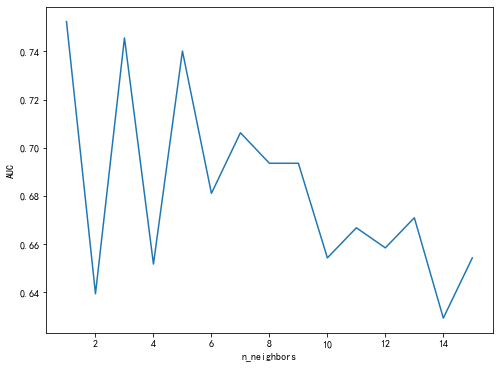

Test AUC for the best knn: 0.7301587301587301


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from fduml.neighbors.k_nearest_neighbor import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

n_neighbors_list = [i for i in range(1, 16)]
num_loops = 2
aucs = []
models = []

# using K-fold validation
kf = KFold(n_splits=5, shuffle=True, random_state=137)

for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, num_loops=num_loops)
    fold_aucs = []
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        knn.fit(X_fold_train, y_fold_train)
        y_pred = knn.predict(X_fold_val)
        auc = roc_auc_score(y_fold_val, y_pred)
        fold_aucs.append(auc)
    mean_auc = np.mean(fold_aucs)
    aucs.append(mean_auc)
    models.append(knn)

best_knn = models[np.argmax(aucs)]
print("Max Validation AUC = {}\tn_neighbors={}".format(np.max(aucs), n_neighbors_list[np.argmax(aucs)]))
    
plt.plot(n_neighbors_list, aucs)
plt.xlabel('n_neighbors')
plt.ylabel('AUC')
plt.show()

y_pred_test = best_knn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_test)
print("Test AUC for the best knn: {}".format(auc))

**b) Decision Tree**

Max Validation AUC=0.8163148228583011	criterion=info_gain_ratio	splitter=best	max_features=13
Test AUC for the best decision tree: 0.7090336134453781


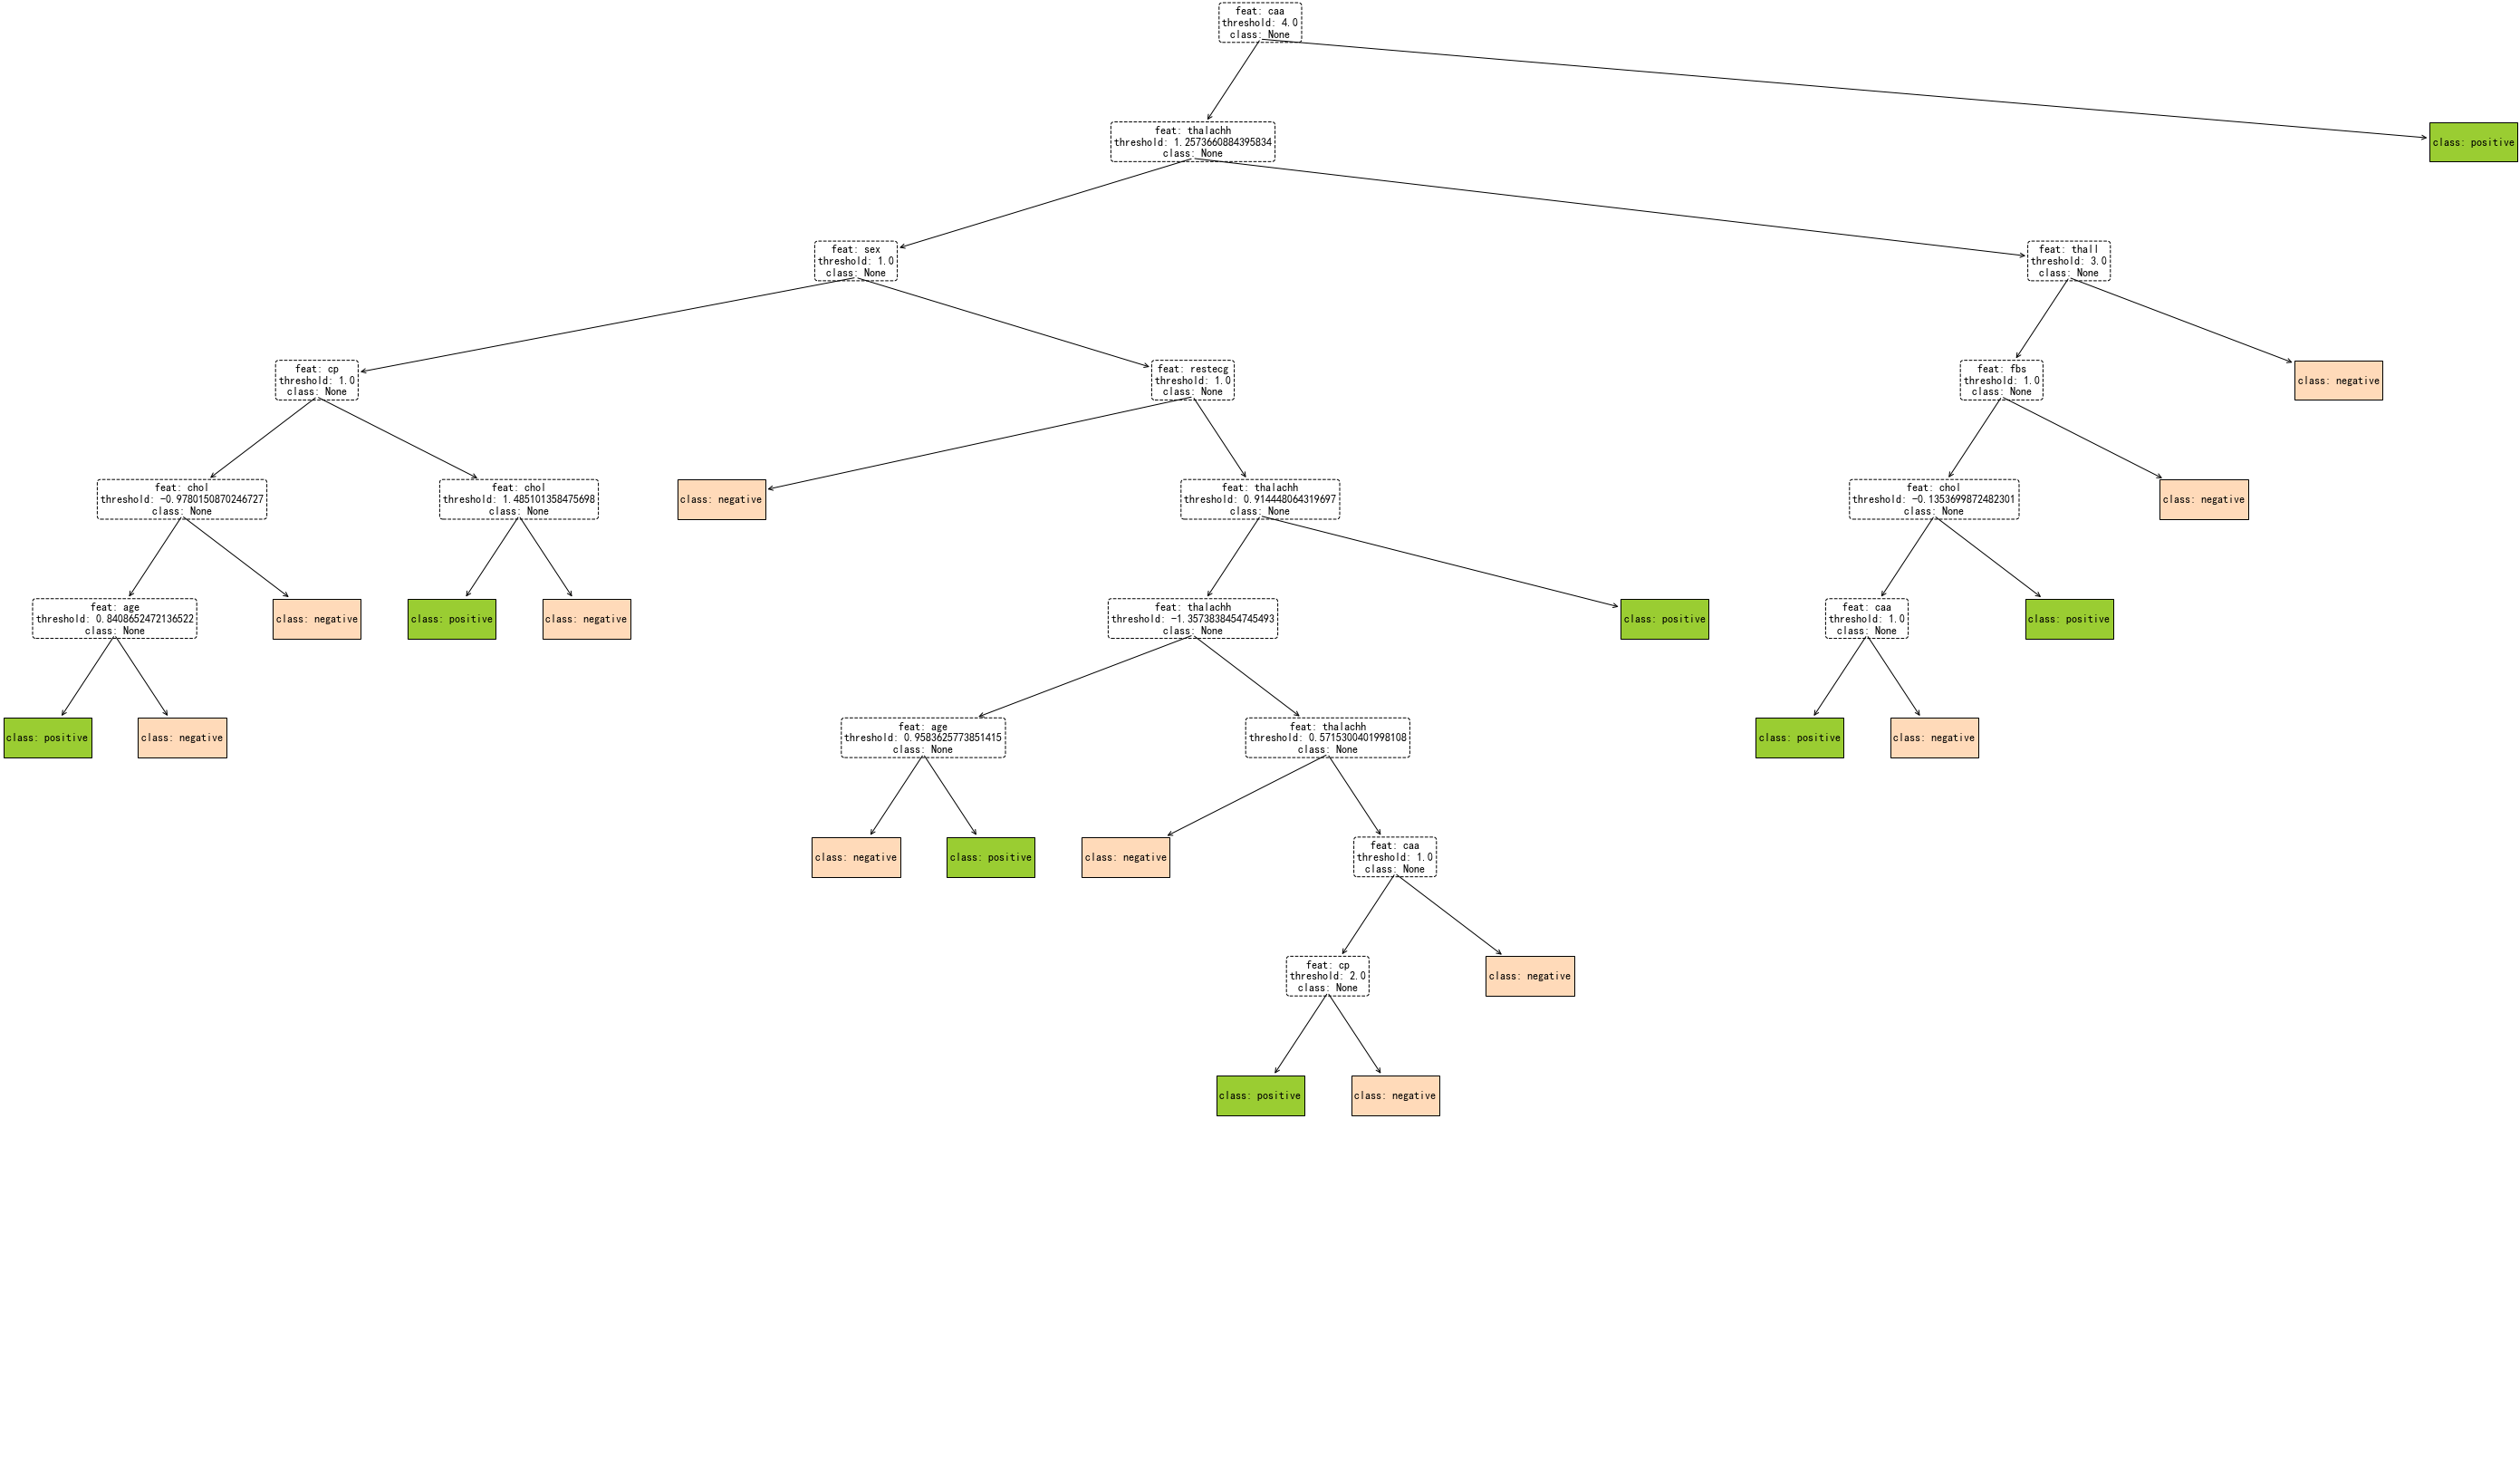

In [153]:
from fduml.tree.decision_tree import DecisionTreeClassifier
from fduml.tree.plot import plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

feature_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa' ,'thall']
class_names = ['negative', 'positive']
criterion_list = ["info_gain", "info_gain_ratio", "gini", "error_rate"]
splitters = ['best', 'random']
max_features_list = [None, 7, 13]

aucs = []
models = []

kf = KFold(n_splits=5, shuffle=True, random_state=167)

for criterion in criterion_list:
    for max_features in max_features_list:
        dt = DecisionTreeClassifier(max_features=max_features, criterion=criterion)
        fold_aucs = []
        for train_index, val_index in kf.split(X_train):
            X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
            y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
            dt.fit(X_fold_train, y_fold_train)
            y_pred = dt.predict(X_fold_val)
            auc = roc_auc_score(y_fold_val, y_pred)
            fold_aucs.append(auc)
        mean_auc = np.mean(fold_aucs)
        aucs.append(mean_auc)
        models.append(dt)

best_dt = models[np.argmax(aucs)]
best_auc = np.max(aucs)
print("Max Validation AUC={}\tcriterion={}\tsplitter={}\tmax_features={}".format(best_auc, best_dt.criterion, best_dt.splitter, best_dt.max_features))

plot_tree(best_dt, feature_names, class_names)

y_pred_test = best_dt.predict(X_test)
auc = roc_auc_score(y_test, y_pred_test)
print("Test AUC for the best decision tree: {}".format(auc))

**c) Logistic Regression**

There are many hyper-parameters to be tuned. After many experiments, I find that:

1. for lr<=0.001, auc=0.5; if lr is too big, the model will overfit on training data, leading to small auc
2. increasing iterations will increasing training time, but not necessarily increase auc, and may cause overfitting
3. batch size doesn't impact the performance much
4. regularization can't be too big(>=10), or loss will explode.

In [168]:
from fduml.linear_model.softmax import SoftmaxClassifier
import seaborn as sns
import matplotlib.pyplot as plt

lr_list = [1, 0.1, 0.01, 0.001, 0.0001]
reg_list = [1, 0, 0.1, 0.01]
bs_list = [4, 64, 128]
iterations_list = [50, 100, 150]

best_auc = 0
best_sfc = None

kf = KFold(n_splits=5, shuffle=True, random_state=137)

for lr in lr_list:
    for reg in reg_list:
        for bs in bs_list:
            for iterations in iterations_list:
                sfc = SoftmaxClassifier(learning_rate=lr, reg=reg, num_iters=iterations, batch_size=bs, loss_type='vectorized')
                fold_aucs = []
                for train_index, val_index in kf.split(X_train):
                    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
                    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
                    sfc.fit(X_fold_train, y_fold_train)
                    y_pred = sfc.predict(X_fold_val)
                    auc = roc_auc_score(y_fold_val, y_pred)
                    fold_aucs.append(auc)
                mean_auc = np.mean(fold_aucs)
                if mean_auc > best_auc:
                    best_sfc = sfc
                    best_auc = mean_auc

print("Max Validation AUC={}\tlr={}\treg={}\tbs={}\titerations={}".format(best_auc, best_sfc.learning_rate, best_sfc.reg, best_sfc.batch_size, best_sfc.num_iters))

y_test_pred = best_sfc.predict(X_test)
auc = roc_auc_score(y_test, y_test_pred)
print("Test AUC for the best Softmax Classifier = {}".format(auc))

Max Validation AUC=0.8252075702075702	lr=1	reg=0.01	bs=128	iterations=50
Test AUC for the best Softmax Classifier = 0.7563025210084033


As we can see,the hyperparameters that help the model get the best accuracy don't garantee the best auc score. In binary classification problem, using auc scores to evaluate the performance of a model is better than using accuracy as metrics.

### 7) Conclusion (5 points)

Please write your conclusion here:

1. Softmax Classifier performs better than KNN Classifier and Decision Tree Classifier. So choosing a right model is critical.
2. Auc score is a better evaluation indicator than accuracy for binary classification problems, but the latter still conveys valuable information about how to tune the hyper-parameters.
3. Hyper-parameters need to be tuned to best fit the models
4. EDA is important and it helps us to find the potential traps and underlying information of the dataset so that we can apply better data pre-processing. This helps to improve the models' performance.
5. During the experiment, it often occurs that the validation accuracy or auc is much higher than test accuracy or auc. This shows that the model is overfitting to the training data, i.e. overfitting. This problem can be mitigated by tuning hyper-parameters.

--------------------------

<font color='red' size = 3>🎉You have completed this assignment! We believe that through practice you have a deeper understanding of many course content, thank you for your efforts!</font>